In [2]:
%pylab inline
figsize(18,6)

Populating the interactive namespace from numpy and matplotlib


In [20]:
def run():
    # simulate casino throw
    p = uniform()
    alice = 0
    bob = 0
    good = False
    
    while alice < 6 and bob < 6:
        # roll ball
        x = uniform()
        
        # record score
        if x < p:
            alice += 1
        else:
            bob += 1
        
        if alice==5 and bob==3:
            good = True
            
    return (alice, bob, p, good)
        

In [38]:
results = []

while len(results) < 1000000:
    y = run()
    if y[3]:
        results.append(y)

In [40]:
probs = [x[2] for x in results]
alice_wins = [x for x in results if x[0] == 6]

In [41]:
print len(alice_wins)*1.0/len(results)
print 10.0/11, 485.0/512

0.909064
0.909090909091 0.947265625


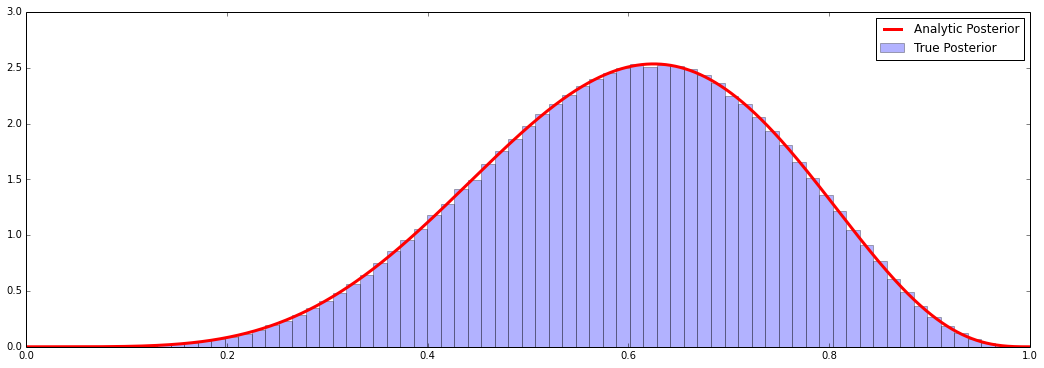

In [44]:
_ = hist(probs, bins=70, normed=True, alpha=0.3, label="True Posterior")
X = linspace(0, 1, 10000)
N = (X**5)*((1-X)**3)
D = 1.0/(9*8*7)
Y = N/D
plot(X, Y, 'r-', linewidth=3, label="Analytic Posterior")
legend()

In [45]:
probs.sort()
L = len(probs)
c, d = probs[int(L*0.025)], probs[int(L*0.975)]

print "The MLE for p is: {:.3f}".format(3.0/5)
print "The expected value of the posterior is: {:.3f}".format(mean(probs))
print "The median is: {:.3f}".format(probs[int(L*0.5)])
print "The 95% credible region for p is: ({:.3f}, {:.3f})".format(c, d)

The MLE for p is: 0.600
The expected value of the posterior is: 0.600
The median is: 0.607
The 95% credible region for p is: (0.299, 0.863)
